<a href="https://colab.research.google.com/github/lnpetrova/comp_ling/blob/master/ML_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image

In [0]:
import tarfile
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-02-13 08:40:37--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.5MB/s    in 5.7s    

2020-02-13 08:40:43 (14.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
tarfile.open('/content/aclImdb_v1.tar.gz', 'r').extractall()

In [0]:
path_test_neg = '/content/aclImdb/test/neg'
path_test_pos = '/content/aclImdb/test/pos'
path_train_neg = '/content/aclImdb/train/neg'
path_train_pos = '/content/aclImdb/train/pos'

In [0]:
pathes = []
pathes.append(path_test_neg)
pathes.append(path_test_pos)
pathes.append(path_train_pos)
pathes.append(path_train_neg)

In [0]:
def get_files(path):
  find_files = os.walk(path)
  list_of_files = list(find_files)[0][-1]
  return list_of_files

In [0]:
for path in pathes:
  get_files(path)

In [0]:
def collect_texts(path, files):
  texts = [open('{}/{}'.format(path, file)).read().lower() for file in files]
  return texts

In [46]:
test_pos_df = pd.DataFrame(collect_texts(path_test_pos, tests_pos),  columns = ['text'])
test_pos_df['polarity'] = 1
test_pos_df.head()

,text,polarity
0,"the patriot is a well thought out, well produc...",1
1,this is by far one of the best films that indi...,1
2,i saw this movie at the 2005 toronto internati...,1
3,"michael radford, the director of ""the merchant...",1
4,strangeland seems to have a love/hate relation...,1


In [47]:
test_neg_df = pd.DataFrame(collect_texts(path_test_neg, tests_neg),  columns = ['text'])
test_neg_df['polarity'] = 0
test_neg_df.head()

,text,polarity
0,"a ""40 foot long"" giant mutant squid with five ...",0
1,my house mate and i foolishly purchased the vi...,0
2,this movie should be called blame it on the sc...,0
3,"oh man, where to even begin.....<br /><br />dr...",0
4,(warning: some spoilers ahead.)<br /><br />wha...,0


In [48]:
test = pd.concat((test_pos_df, test_neg_df))
test

,text,polarity
0,"the patriot is a well thought out, well produc...",1
1,this is by far one of the best films that indi...,1
2,i saw this movie at the 2005 toronto internati...,1
3,"michael radford, the director of ""the merchant...",1
4,strangeland seems to have a love/hate relation...,1
...,...,...
12495,another sequel! why on earth do they keep maki...,0
12496,an anonymous film which could have been direct...,0
12497,"just read through the other comments here, and...",0
12498,there is so much bad to say about this movie a...,0


In [50]:
train_pos_df = pd.DataFrame(collect_texts(path_train_pos, trains_pos),  columns = ['text'])
train_pos_df['polarity'] = 1
train_pos_df.head()

,text,polarity
0,how nice to have a movie the entire family can...,1
1,"an unmarried, twenty-something hick (played by...",1
2,in the old commercial for blank audio cassette...,1
3,"i have just started watching the tv series ""wh...",1
4,sidney young (pegg) moves from england to new ...,1


In [51]:
train_neg_df = pd.DataFrame(collect_texts(path_train_neg, trains_neg),  columns = ['text'])
train_neg_df['polarity'] = 0
train_neg_df.head()

,text,polarity
0,don't bother. a little prosciutto could go a l...,0
1,"sure i've seen bad movies in my life, but this...",0
2,night of the comet starts as the world prepare...,0
3,this dreadful film assembles every asian stere...,0
4,i usually talk a bit about the plot in the fir...,0


In [52]:
train = pd.concat((train_pos_df, train_neg_df))
train

,text,polarity
0,how nice to have a movie the entire family can...,1
1,"an unmarried, twenty-something hick (played by...",1
2,in the old commercial for blank audio cassette...,1
3,"i have just started watching the tv series ""wh...",1
4,sidney young (pegg) moves from england to new ...,1
...,...,...
12495,"this movie is all ultra-lightweight fluff, pre...",0
12496,"i had a feeling that after ""submerged"", this o...",0
12497,"return to cabin by the lake does not, in any w...",0
12498,this film was a big disappointment.<br /><br /...,0


In [53]:
train = shuffle(train, random_state=42)
train = train[:10000]
train.head()

,text,polarity
6868,this movie is ridiculous! that's exactly what ...,1
11516,i'm here again in your local shopping mall (of...,0
9668,written and directed by steve gordon. running ...,1
1140,"no laughs whatsoever. yes, i watched this enti...",0
1518,the producers made a big mistake casting mark ...,0


In [0]:
X_train = vectorizer.fit_transform(train.text)
y_train = train.polarity

In [36]:
test = shuffle(test, random_state=42)
test = test[:2500]
test.head()

,text,polarity
11973,"again, like many other tv shows, a certain act...",0
1530,for me this wonderful rollercoaster of a film ...,1
4343,"this movie, without doubt is the best i have s...",1
5566,i am so angry to the point i normally down mak...,0
3471,when i first saw the previews for this movie o...,0


In [0]:
X_test = vectorizer.transform(test.text)
y_test = test.polarity

In [0]:
def eval_sklearn(true, predicted, categories = ['neg', 'pos'], visual=True):
    acc = accuracy_score(true, predicted)
    micro_p = precision_score(true, predicted, average = 'micro')
    macro_p = precision_score(true, predicted, average = 'macro')
    weighted_p = precision_score(true, predicted, average = 'weighted')
    micro_r = recall_score(true, predicted, average = 'micro')
    macro_r = recall_score(true, predicted, average = 'macro')
    weighted_r = recall_score(true, predicted, average = 'weighted')
    micro_f1 = f1_score(true, predicted, average = 'micro')
    macro_f1 = f1_score(true, predicted, average = 'macro')
    weighted_f1 = f1_score(true, predicted, average = 'weighted')
    fpr, tpr, _ = roc_curve(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    if visual:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        ax1.plot(fpr, tpr, marker='.', label='Test')
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend()
        sns.heatmap(data=confusion_matrix(y_test, logreg_preds), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
        ax2.set_title("Confusion matrix")
        plt.show()

    print(''' 
ROC AUC:\t{:.3f}
Accuracy:\t{:.3f}
\t\tMicro\tMacro\tWeighted
Precision:\t{:.3f}\t{:.3f}\t{:.3f}
Recall:\t\t{:.3f}\t{:.3f}\t{:.3f}
F-measure:\t{:.3f}\t{:.3f}\t{:.3f}
'''.format(roc_auc, acc, micro_p, macro_p, weighted_p, micro_r, macro_r, weighted_r, micro_f1, macro_f1, weighted_f1))

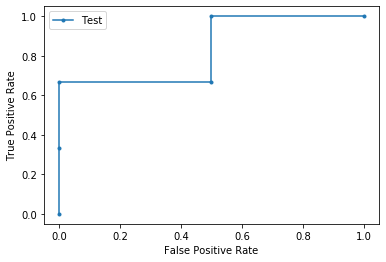

In [0]:

y_true = np.array([0, 1, 1, 1, 0])
y_predicted = np.array([0.1, 0.7, 0.4, 0.2, 0.27])
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
from sklearn.datasets import fetch_20newsgroups
data.target_names

NameError: ignored